## imports and files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)

from experiments.utils.loader import Loader

In [6]:
from json import load
from unittest import loader


series = 11
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))

loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper)

## config map reader

In [3]:
loader.key_config_mapper()

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,yolo,yolov5n,16,40Gi,1,1,20,15,11,checking the effect of batch size under 20 and...,1
1,2,5-paper-video,yolo,yolov5n,16,40Gi,1,1,20,15,11,checking the effect of batch size under 20 and...,1
2,3,5-paper-video,yolo,yolov5n,16,40Gi,2,1,20,15,11,checking the effect of batch size under 20 and...,1
3,4,5-paper-video,yolo,yolov5n,16,40Gi,2,1,20,15,11,checking the effect of batch size under 20 and...,1
4,5,5-paper-video,yolo,yolov5n,16,40Gi,4,1,20,15,11,checking the effect of batch size under 20 and...,1
5,6,5-paper-video,yolo,yolov5n,16,40Gi,4,1,20,15,11,checking the effect of batch size under 20 and...,1
6,7,5-paper-video,yolo,yolov5n,16,40Gi,8,1,20,15,11,checking the effect of batch size under 20 and...,1
7,8,5-paper-video,yolo,yolov5n,16,40Gi,8,1,20,15,11,checking the effect of batch size under 20 and...,1
8,9,5-paper-video,yolo,yolov5n,16,40Gi,16,1,20,15,11,checking the effect of batch size under 20 and...,1
9,10,5-paper-video,yolo,yolov5n,16,40Gi,16,1,20,15,11,checking the effect of batch size under 20 and...,1


In [7]:
loader.get_experiment_detail(2)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
1,2,5-paper-video,yolo,yolov5n,16,40Gi,1,1,20,15,11,checking the effect of batch size under 20 and...,1


In [9]:
loader.get_result_file_names()

['6.json',
 '11.json',
 '13.json',
 '9.json',
 '21.json',
 '10.json',
 '25.json',
 '29.json',
 '18.json',
 '4.json',
 '15.json',
 '20.json',
 '8.json',
 '1.json',
 '19.json',
 '3.json',
 '28.json',
 '27.json',
 '22.json',
 '23.json',
 '7.json',
 '17.json',
 '5.json',
 '2.json',
 '14.json',
 '26.json',
 '24.json',
 '12.json',
 '16.json']

## Read resutls

In [10]:
results = loader.read_results()
print(results.keys())

dict_keys(['6', '11', '13', '9', '21', '10', '25', '29', '18', '4', '15', '20', '8', '1', '19', '3', '28', '27', '22', '23', '7', '17', '5', '2', '14', '26', '24', '12', '16'])


In [11]:
flattened_results = loader.flatten_results(results['1']['responses'])
len(flattened_results)

300

In [12]:
experiment_id = 1 
latencies, timeout_count = loader.latency_calculator(
    loader.flatten_results(results[str(experiment_id)]['responses']))
print(f'{timeout_count=}')
print(pd.DataFrame(latencies))

timeout_count=1
     client_to_server_latencies  model_latencies  model_to_server_latencies
0                      7.902779         0.243616                  74.225154
1                     11.702861         0.115296                  76.820222
2                     14.960619         0.203193                  78.445163
3                     13.582093         0.096915                  77.447372
4                     14.254098         0.108681                  78.042929
..                          ...              ...                        ...
294                  338.571803         0.103999                  71.861617
295                  327.890343         0.088208                  76.915527
296                  343.659739         0.087093                  69.549346
297                  335.009527         0.088630                  73.350324
298                  331.639736         0.097335                  75.278997

[299 rows x 3 columns]


In [13]:
summary = loader.latency_summary(latencies=latencies)
pd.DataFrame(list(summary.items()))

,0,1
0,client_to_server_latencies_avg,154.461151
1,client_to_server_latencies_p99,344.217248
2,client_to_server_latencies_p50,143.042997
3,client_to_server_latencies_var,10728.490930
4,client_to_server_latencies_max,347.262950
5,client_to_server_latencies_min,2.249466
6,model_latencies_avg,0.101967
7,model_latencies_p99,0.287441
8,model_latencies_p50,0.089349
9,model_latencies_var,0.001464


In [14]:
results = loader.result_processing()
print(results)
results.columns

    experiment_id  client_to_server_latencies_avg  \
0               6                      253.799123   
1              11                      152.346873   
2              13                      262.352194   
3               9                      269.771408   
4              21                      191.116574   
5              10                      261.001953   
6              25                      276.977575   
7              29                      333.209380   
8              18                      254.320652   
9               4                      281.104036   
10             15                      248.410733   
11             20                      264.181163   
12              8                      256.953850   
13              1                      154.461151   
14             19                      272.636924   
15              3                      270.181336   
16             28                      295.116106   
17             27                      299.412

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

In [17]:
key_config_df = loader.key_config_mapper(config_key_mapper)
selected_key_config_df =  key_config_df[key_config_df['model_variant'] == 'yolov5n']
selected_key_config_df

TypeError: key_config_mapper() takes 1 positional argument but 2 were given

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,0.287441,590.470320,0.101967
1,yolov5n,1,0.283168,1607.141199,0.100887
2,yolov5n,2,0.460552,538.296242,0.175557
3,yolov5n,2,0.537392,1634.842875,0.194778
4,yolov5n,4,0.841020,485.813881,0.357063
5,yolov5n,4,0.690880,1379.846183,0.326866
6,yolov5n,8,1.650246,518.880330,0.816010
7,yolov5n,8,1.239710,1368.310432,0.636797
8,yolov5n,16,1.519147,437.657912,1.257436
9,yolov5n,16,1.410390,1230.713972,1.256584


<AxesSubplot: xlabel='max_batch_size'>

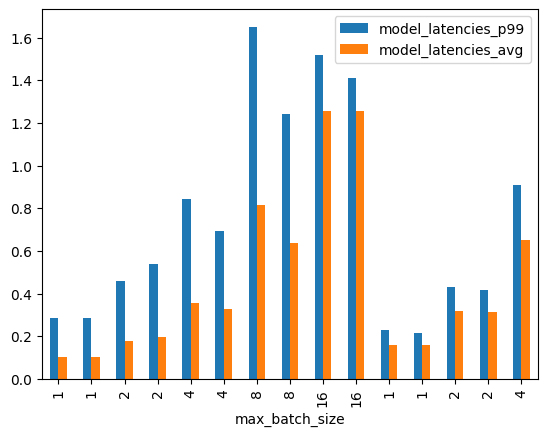

In [19]:
def table_maker(
    experiment_ids: List[int],
    metadata_columns, results_columns):
    # extract full data
    results = loader.result_processing()
    metadata = loader.key_config_mapper()
    # retrieve rows
    selected_results = results[results[
        'experiment_id'].isin(experiment_ids)]
    selected_metadata = metadata[metadata[
        'experiment_id'].isin(experiment_ids)]
    merged_results = selected_metadata.merge(selected_results)
    columns = metadata_columns + results_columns
    output = merged_results[columns]
    return output

experiment_ids = np.arange(1, 16).tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,0.287441,590.470320,0.101967
1,yolov5n,1,0.283168,1607.141199,0.100887
2,yolov5n,2,0.460552,538.296242,0.175557
3,yolov5n,2,0.537392,1634.842875,0.194778
4,yolov5n,4,0.841020,485.813881,0.357063
5,yolov5n,4,0.690880,1379.846183,0.326866
6,yolov5n,8,1.650246,518.880330,0.816010
7,yolov5n,8,1.239710,1368.310432,0.636797
8,yolov5n,16,1.519147,437.657912,1.257436
9,yolov5n,16,1.410390,1230.713972,1.256584


<AxesSubplot: xlabel='max_batch_size'>

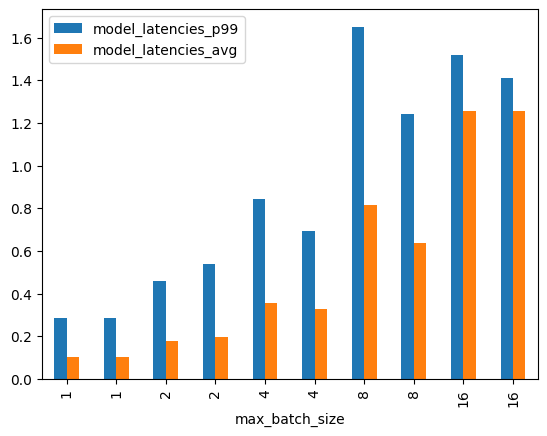

In [22]:
# yolo 5n
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5n']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5m,1,0.229681,872.139475,0.159899
1,yolov5m,1,0.212636,2225.663702,0.160001
2,yolov5m,2,0.432192,767.008656,0.318409
3,yolov5m,2,0.414404,2075.306066,0.313605
4,yolov5m,4,0.906732,650.343609,0.648725
5,yolov5m,4,0.780302,1871.517656,0.668191
6,yolov5m,8,1.771126,667.919178,1.449526
7,yolov5m,8,1.552486,1877.260880,1.407840
8,yolov5m,16,3.639643,728.755460,3.281588
9,yolov5m,16,3.405638,2043.575312,3.007310


<AxesSubplot: xlabel='max_batch_size'>

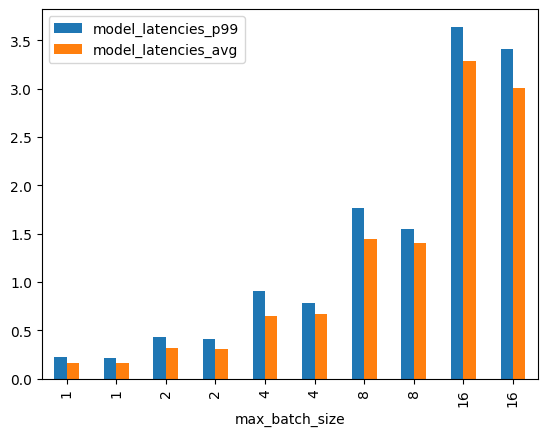

In [23]:
# resnet 5s
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5m']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

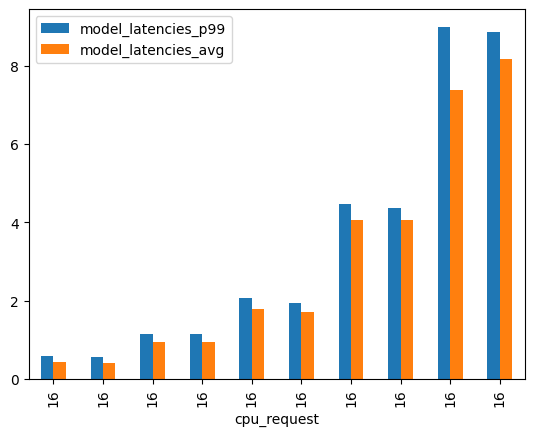

In [24]:
# yolov5x
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5x']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,16,40Gi,0.460552,538.296242,0.175557
1,yolov5n,16,40Gi,0.537392,1634.842875,0.194778
2,yolov5m,16,40Gi,0.432192,767.008656,0.318409
3,yolov5m,16,40Gi,0.414404,2075.306066,0.313605
4,yolov5x,16,40Gi,1.154209,1687.035852,0.941032
5,yolov5x,16,40Gi,1.146128,4614.602874,0.940430


<AxesSubplot: xlabel='model_variant'>

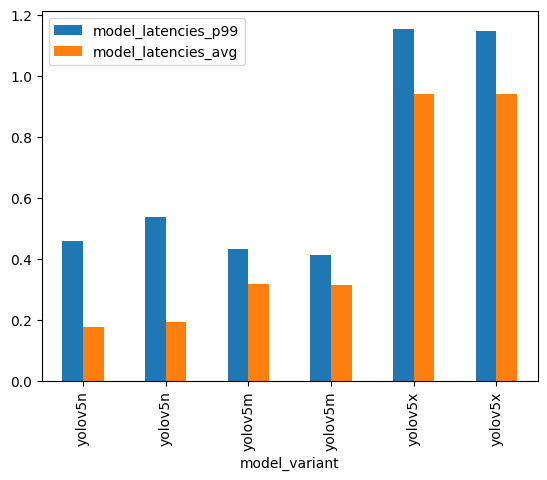

In [26]:
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == 2]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])